<h1> Applying Naive Bayes Classifier <h1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<h2> Loading Data <h2>

In [3]:
arr2= np.load('data_array_non_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1500000 6.241185 101.0 ... 0 0 0]
 [8000000 11.774191 103.0 ... 0 1 0]
 [1500000 1.0582129999999998 138.0 ... 1 0 0]
 ...
 [20000000 3.010088 121.0 ... 1 0 0]
 [35000000 11.318079 141.0 ... 1 0 0]
 [750000 2.936402 83.0 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


<h2> Default Naive Bayes <h2>

Testing score:  0.7701674277016742
Training Score:  0.7911669522177803
F1 Score: 0.6773865699308892
              precision    recall  f1-score   support

     Average       0.78      0.99      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.18      0.02      0.03       104

    accuracy                           0.77      1314
   macro avg       0.32      0.34      0.30      1314
weighted avg       0.62      0.77      0.68      1314

Confusion Matrix values 
 [[1010    0    9]
 [ 191    0    0]
 [ 102    0    2]]


C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


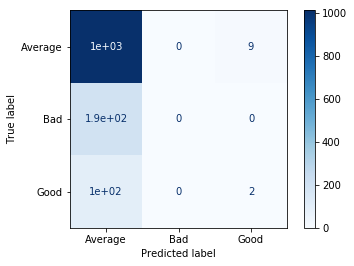

In [5]:
#Using Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()

clf1.fit(X_train, y_train); #train the classifier

print ('Testing score: ',clf1.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf1.score (X_train, y_train)) # print the trainig score(accuracy)
y_pred =clf1.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

#lets print classification Report
print(classification_report(y_test, y_pred))


#Lets print confision matrix
labels =['Average','Bad','Good']

print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)


<h2> Evaluating The Classifier with different data <h2>

In [20]:
#lets make sure that the results are consistent with different samples

test_score = []
train_score = []
f1_scores = []

clf =  GaussianNB()
#check 50 times with random data splits
for i in range(50):
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    

df = pd.DataFrame(list(zip(test_score,train_score,f1_scores)),columns = ['test_score','train_score','f1_scores'])   

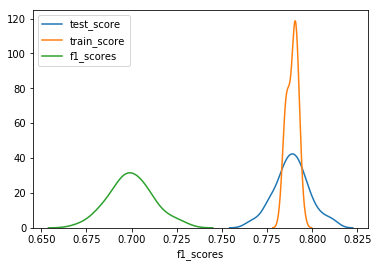

In [21]:
#lets check how the values are distributed when we use random training and testing data

for col in df.columns:
    sns.distplot(df[col],hist=False,label=col)

As seen above, the testing and training score do not have a huge variation in them.
However, different selection of data can have an impact on the f1 scores, which ranges from 0.65 to 0.725